# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 1. Moravec Corner Detection

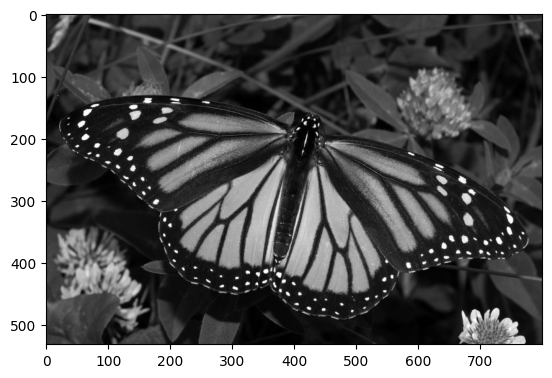

In [2]:
im = plt.imread('monarch_in_may.jpg')
imGray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.imshow(imGray,cmap='gray')

In [4]:
numRows, numColumns = imGray.shape[0], imGray.shape[1]
directions = {
    'left': (0,-1),
    'right':(0,1),
    'up':(-1,0),
    'down':(1,0),
    'up_left':(-1,-1),
    'up_right':(-1,1),
    'down_left':(1,-1),
    'down_right':(1,1),
}

In [16]:
C = np.zeros(imGray.shape)

#starting in 2 to ignore image ending when batching and shifting
for i in range(2,numRows-2):
    for j in range(2,numColumns-2):
        minSSD = -1
        for d in directions.values():
            u, v = d[0],d[1]
            P1 = imGray[i-1:i+2, j-1:j+2]
            P2 = imGray[i+u-1:i+u+2, j+v-1:j+v+2]
            ssd = np.sum((P1-P2)**2)
            if minSSD == -1:
                minSSD = ssd
            elif ssd < minSSD:
                minSSD = ssd
        C[i,j] = minSSD

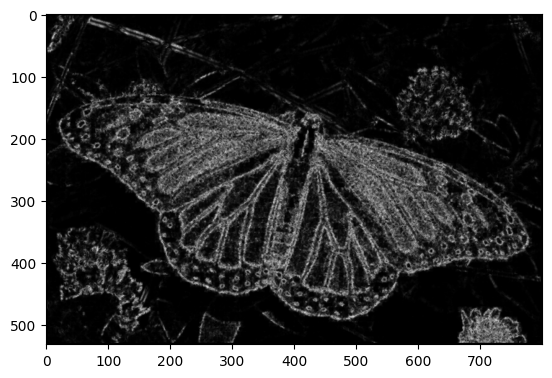

In [17]:
plt.imshow(C,cmap='gray')

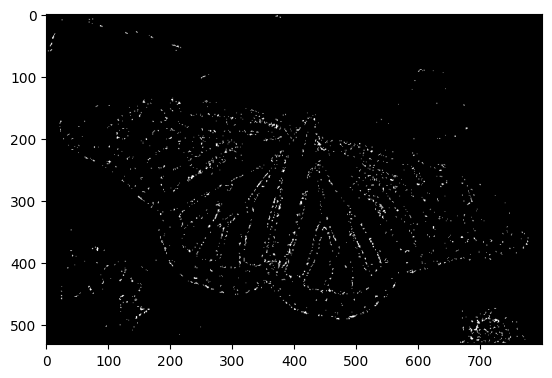

In [18]:
th = C.mean() + 3*C.std()
im_C  = C> th
plt.imshow(im_C, cmap='gray')

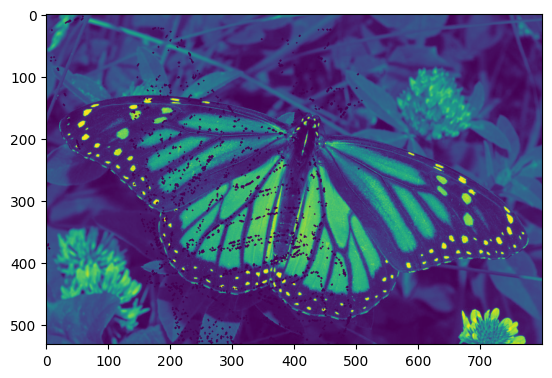

In [21]:
I2 = imGray.copy()
idx = np.argwhere(im_C)
r,c = idx[:,0], idx[:,1]
for i in range(len(r)):
    I2 = cv2.circle(np.float32(I2), (r[i], c[i]), radius=1, color=(0,0,255), thickness=-1)
plt.imshow(I2)

# 2. Harris Corner Detection

In [33]:
I = np.float64(imGray)
#calculating S matrix
mask_x = np.array([[-1],[1]])
Ix = cv2.filter2D(I, -1, mask_x)
Iy = cv2.filter2D(I, -1, mask_x.T)
Ix2 , Iy2 , IxIy = Ix*Ix, Iy*Iy , Ix*Iy
#convoluting with K
K = np.ones((3,3))
sIx2 = cv2.filter2D(Ix2, -1, K)
sIy2 = cv2.filter2D(Iy2, -1, K)
sIxIy = cv2.filter2D(IxIy, -1, K)
L1 = ((sIx2+sIy2)+((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2
L2 = ((sIx2+sIy2)-((sIx2+sIy2)**2 - 4*(IxIy**2))**0.5)/2

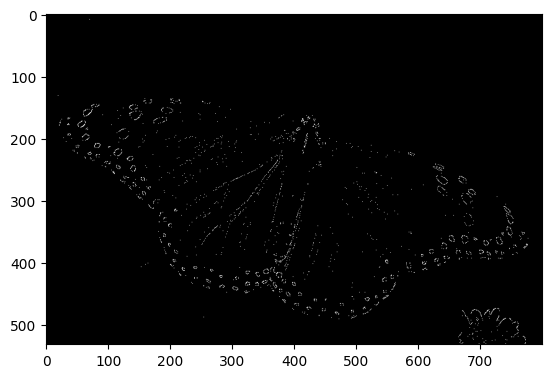

In [34]:
th = L2.mean() + 3*L2.std()
im_C  = L2 > th
plt.imshow(im_C, cmap='gray')